# QF 627 Programming and Computational Finance
## Problem-Sets for Exercise `9` | `Questions`

> Hi Team, 👋

> The initial problem sets were designed for practicing supervised learning in classification problems and hierarchical risk parity algorithms, as well as applying unsupervised learning to portfolio management.

> Given that we haven't covered some these topics in depth yet and will be discussing them further in Lessons 9 and 10, the problem sets have been revised.

> Having reviewed your submissions so far, some of the questions have been crafted specifically to enhance your grasp of the course material.

> I trust that the exercises below will support your review and understanding of the course content. 🤞

#### <font color = "green"> Please submit your answers via the eLearn submission folder. Again, you may submit incomplete answers. (Answer as fully as you can. This will help me to see where you stand.)

### For standardization of your answers…

> Please execute the lines of code below before you start work on your answers.

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import matplotlib as mpl

from pandas_datareader import data as pdr

import datetime as dt
import yfinance as yf

import warnings
warnings.filterwarnings('ignore')

> Let's set some print option.

In [2]:
np.set_printoptions(precision = 3)

plt.style.use("ggplot")

mpl.rcParams["axes.grid"] = True
mpl.rcParams["grid.color"] = "grey"
mpl.rcParams["grid.alpha"] = 0.25

mpl.rcParams["axes.facecolor"] = "white"

mpl.rcParams["legend.fontsize"] = 14

%matplotlib inline

## 👇 <font color = "purple"> Bigger Question 1. 
    
### The first question is to look for clusters of correlations using the agglomerate hierarchical clustering technique (AGNES).
    
### <font color = green> Using the 102 tickers below, and what you have learned in class, run the analysis and develop a dendrogram. Make sure to employ the inclusion criterion of less than 30% of missing values.
    
    According to the dendrogram, which of the stocks are most correlated? 
    
    Also based on the dendrogram, please identify two stocks that are not well correlated.

In [3]:
nasdaq100_components = pd.read_html("https://en.wikipedia.org/wiki/Nasdaq-100")[4]

nasdaq100_components

,Company,Ticker,GICS Sector,GICS Sub-Industry
0,Adobe Inc.,ADBE,Information Technology,Application Software
1,ADP,ADP,Industrials,Human Resource & Employment Services
2,Airbnb,ABNB,Consumer Discretionary,"Hotels, Resorts & Cruise Lines"
3,Align Technology,ALGN,Health Care,Health Care Supplies
4,Alphabet Inc. (Class A),GOOGL,Communication Services,Interactive Media & Services
...,...,...,...,...
96,Warner Bros. Discovery,WBD,Communication Services,Broadcasting
97,"Workday, Inc.",WDAY,Information Technology,Application Software
98,Xcel Energy,XEL,Utilities,Multi-Utilities
99,Zoom Video Communications,ZM,Information Technology,Application Software


### Below are the lines of code that lead to an answer:

In [4]:
from sklearn.cluster import KMeans, AgglomerativeClustering,AffinityPropagation, DBSCAN
from scipy.cluster.hierarchy import fcluster
from scipy.cluster.hierarchy import dendrogram, linkage, cophenet
from scipy.spatial.distance import pdist
from sklearn.metrics import adjusted_mutual_info_score
from sklearn import cluster, covariance, manifold
from scipy.cluster.hierarchy import dendrogram, linkage, ward

import os
os.environ["OMP_NUM_THREADS"] = '1'

In [5]:
from pandas.plotting import scatter_matrix
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn import metrics
import matplotlib.ticker as ticker
from itertools import cycle

In [6]:
tickers = nasdaq100_components["Ticker"]
stock_list = []
for ticker in tickers:
    stock = yf.download(ticker,dt.datetime(2000, 1, 1),dt.datetime(2022, 12, 31))
    data = stock["Adj Close"]
    stock_list.append(pd.Series(data, name=ticker))

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%*******

In [7]:
stock_data = pd.DataFrame(stock_list).T

missing_fractions = \
    stock_data \
    .isnull() \
    .mean() \
    .sort_values(ascending = False)

drop_list =\
    sorted(list(missing_fractions
                [missing_fractions > 0.3]
                .index)
           )

stock_data =\
    stock_data \
    .drop(labels= drop_list, 
          axis=1)

In [8]:
#Calculate average annual percentage return and volatilities over a theoretical one year period

returns =\
(
    stock_data
    .pct_change()
    .mean() 
    * 252
)

returns = pd.DataFrame(returns)

returns.columns = ["Returns"]

returns["Volatility"] =\
(    
     stock_data
    .pct_change()
    .std() 
    * np.sqrt(252)
)

data = returns
data = np.asarray([np.asarray(returns['Returns']),np.asarray(returns['Volatility'])]).T

In [9]:
scaler = StandardScaler().fit(data)
rescaledDataset = pd.DataFrame(scaler.fit_transform(returns),columns = returns.columns, index = returns.index)
X = rescaledDataset

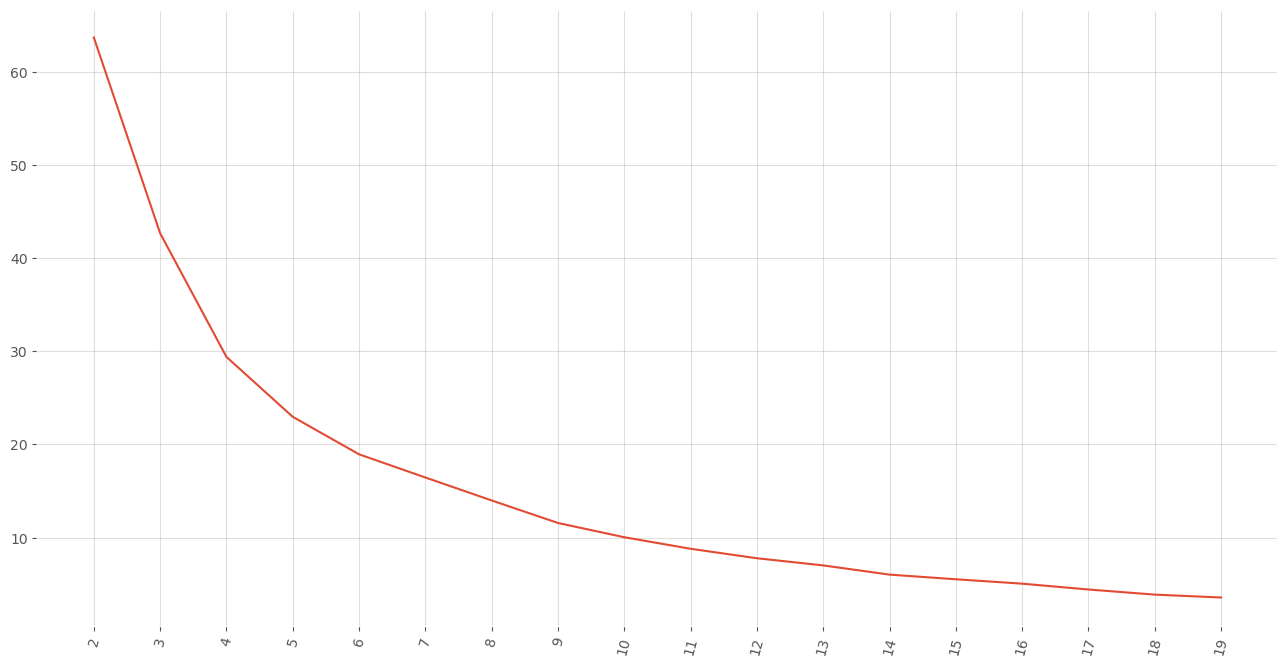

In [10]:
distorsions = []

max_loop = 20

for k in range(2, max_loop):
    kmeans = KMeans(n_clusters = k)
    kmeans.fit(X)
    distorsions.append(kmeans.inertia_)
    
fig = plt.figure(figsize=(16, 8))

plt.plot(range(2, max_loop), distorsions)

plt.xticks([i for i in range(2, max_loop)], 
           rotation=75)

plt.grid(True)

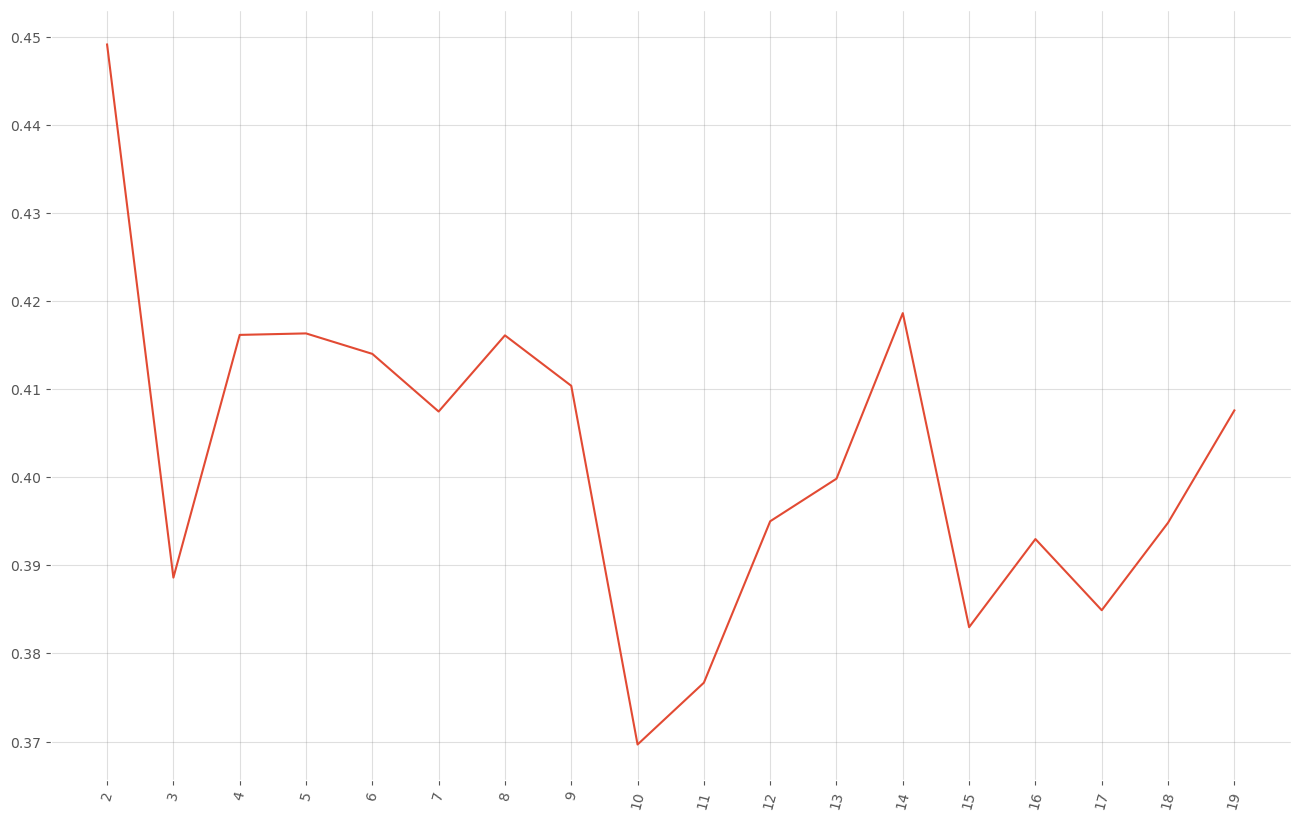

In [11]:
silhouette_score = []

for k in range(2, max_loop):
        kmeans = KMeans(n_clusters = k,  
                        random_state = 10, 
                        n_init = 10)
        kmeans.fit(X)        
        silhouette_score.append(metrics.silhouette_score(X, kmeans.labels_, random_state=10)
                               )
        
fig = plt.figure(figsize=(16, 10)
                )

plt.plot(range(2, max_loop), silhouette_score)

plt.xticks([i for i in range(2, max_loop)], 
           rotation=75)

plt.grid(True)

### <font color = red> Answer 1 is presented in the cell below: </font>

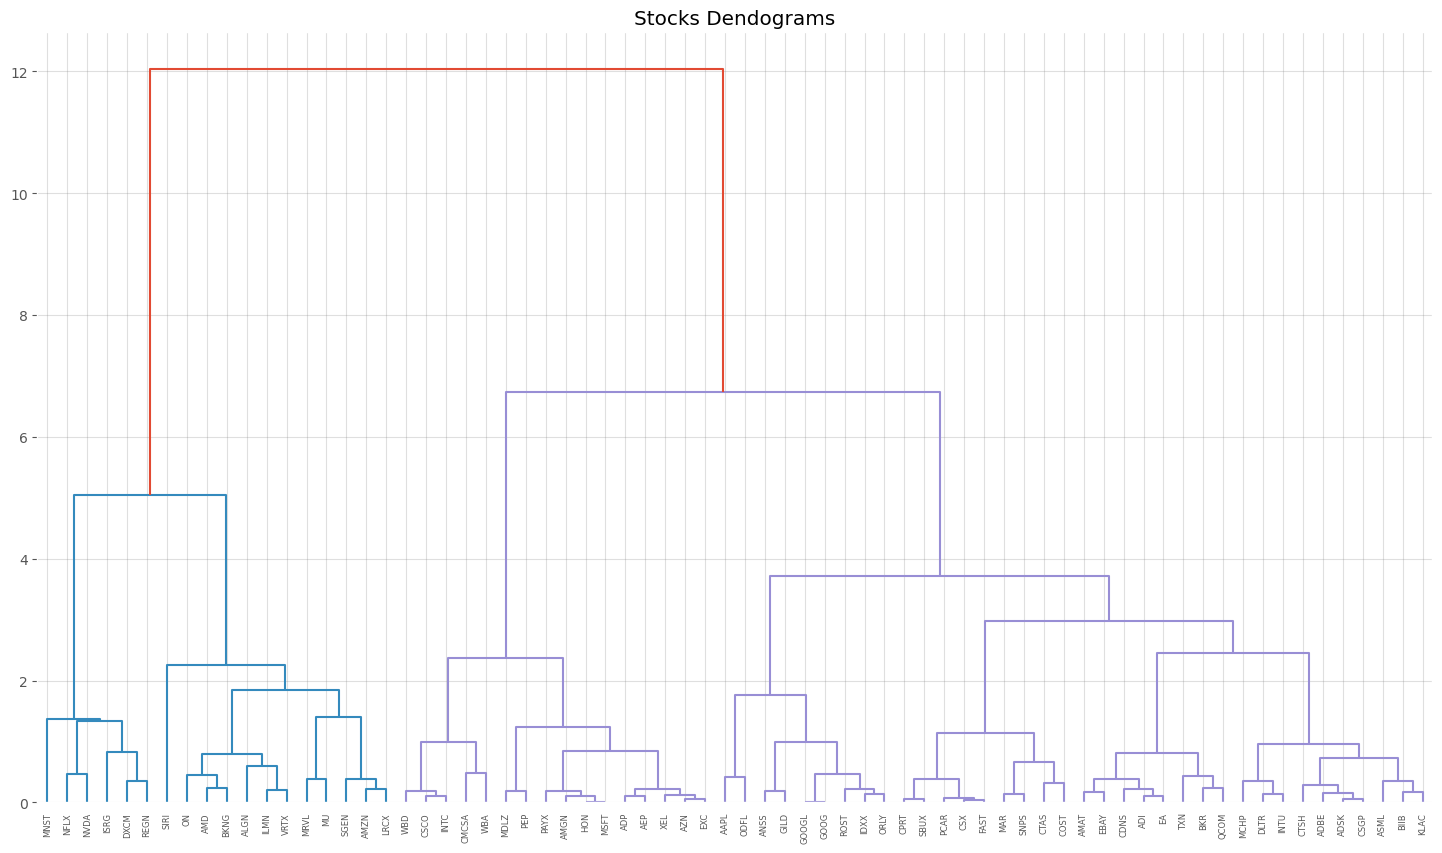

In [12]:
#Calulate linkage
Z = linkage(X, 
            method = "ward")

# Plot Dendogram

plt.figure(figsize=(18, 10)
          )
plt.title("Stocks Dendograms")

dendrogram(Z, labels = X.index)

plt.show()


## 👇 <font color = "purple"> Bigger Question 2. ### 

### The second question asks you to run a principal components analysis (PCA) for portfolio management. Begin your analysis with all the above stocks. Make sure to employ the inclusion criterion of less than 30% of missing values.
    
    Your objective is to find the portfolio using PCA.
    
    Select and normalize the four largest components and use them as weights for 
    portfolios that you can compare to an equal-weighted portfolio comprising all stocks.
    
    Identify the profile of the portfolio based on the portfolio weights.
    
    When comparing the performance of each portfolio over the sample period 
    to "the market", assess the performance of other portfolios that capture different 
    return patterns.
    
> Please use 75% of your data for PCA and 25% for backtesting.    
    
### <font color = "green"> NOTE: The investment horizon will be 10 years between 2010 and 2019.

### Below are the lines of code that lead to an answer:

In [13]:
# for unsupervised learning
from sklearn.decomposition import PCA
from sklearn.decomposition import KernelPCA

from sklearn.decomposition import TruncatedSVD

from numpy.linalg import inv, eig, svd

from sklearn.manifold import TSNE

# for EDA and Data transformation
from sklearn.preprocessing import StandardScaler

from pandas.plotting import scatter_matrix

In [14]:
missing_values =\
(
    stock_data
    .isnull() # True (1) vs. False (0)
    .mean()
    .sort_values(ascending = False)
)

drop_list =\
(
    sorted(list(missing_values[missing_values > 0.30]
                .index)
          )
)

stock_data =\
(
    stock_data
    .drop(labels = drop_list,
          axis = 1)
)

stock_data =\
(
    stock_data
    .fillna(method = "ffill")
)

stock_data =\
(
    stock_data
    .dropna(axis = 0)
)

In [15]:
Daily_Linear_Return =\
(
    stock_data
    .pct_change(1)
)

# Operational defition of outliers = data points beyond 3 SD

Daily_Linear_Return =\
(
    Daily_Linear_Return[Daily_Linear_Return 
                        .apply(lambda x:(x - x.mean()
                                        ).abs() < (3 * x.std()
                                                  )
                              )
                        .all(1)
    ]
)

scaler =\
(
    StandardScaler()
    .fit(Daily_Linear_Return)
)

scaled_stock_data =\
(
    pd
    .DataFrame(scaler.fit_transform(Daily_Linear_Return),
               columns = Daily_Linear_Return.columns,
               index = Daily_Linear_Return.index)
)

In [16]:
prop =\
    int(len(scaled_stock_data) * 0.75)

X_Train = scaled_stock_data[    : prop] # First 80% of the data
X_Test  = scaled_stock_data[prop:     ] # Remaining 20% of the data

X_Train_Raw = Daily_Linear_Return[    :prop]
X_Test_Raw  = Daily_Linear_Return[prop:    ]

stock_tickers =\
(
 scaled_stock_data
 .columns
 .values
)

pca = PCA()

PrincipalComponent = pca.fit(X_Train)

<Axes: title={'center': 'Cumulative Explained Variance by Each PC'}>

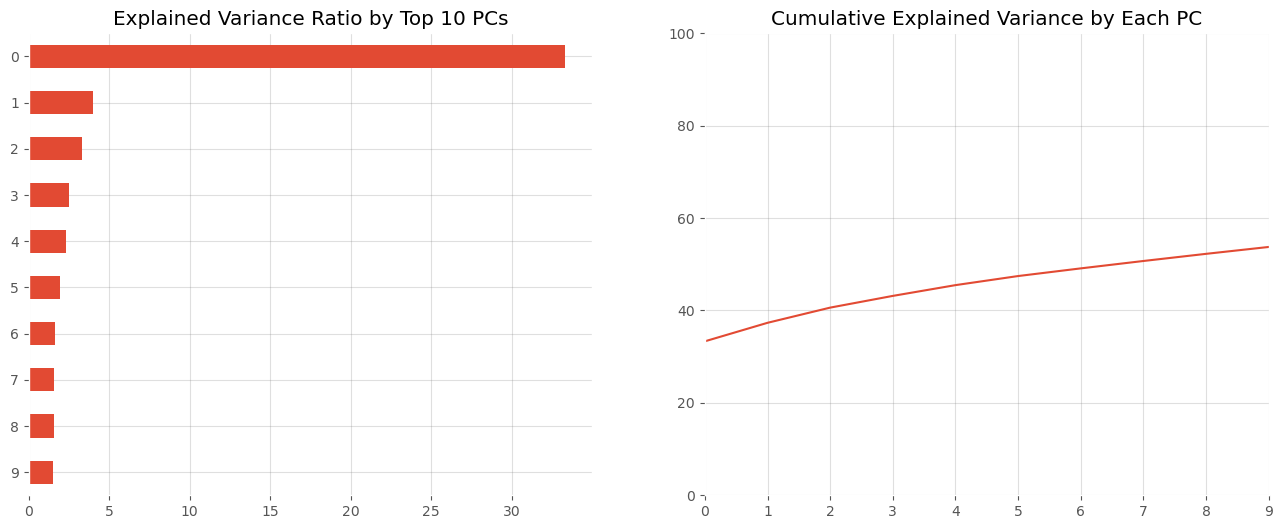

In [17]:
NumEigenValues = 10

fig, axes =\
(
    plt
    .subplots(ncols = 2,
              figsize = [16, 6]
             )
)

# Plot on the left panel

Series1 =\
(
    pd
    .Series(pca
            .explained_variance_ratio_[ :NumEigenValues]
           )
    .sort_values()
    * 100
)

# Plot on the right panel

Series2 =\
(
    pd
    .Series(pca
            .explained_variance_ratio_[ :NumEigenValues]
           )
    .cumsum()
    * 100
)

(
    Series1
    .plot
    .barh(ylim = (0, 9),
          title = "Explained Variance Ratio by Top 10 PCs",
          ax = axes[0]
         )
)

(
    Series2
    .plot(ylim = (0, 100),
          xlim = (0, 9),
          title = "Cumulative Explained Variance by Each PC",
          ax = axes[1]
         )
)

In [18]:
(
    pd
    .Series(np
           .cumsum(pca
                   .explained_variance_ratio_)
           )
    .to_frame("Explained Variance")
    .head(NumEigenValues)
    .style
    .format("{:,.2%}".format)
)

,Explained Variance
0,33.33%
1,37.34%
2,40.62%
3,43.16%
4,45.49%
5,47.45%
6,49.11%
7,50.71%
8,52.26%
9,53.75%


In [19]:
def PCWeights():

    weights = pd.DataFrame()

    for i in range(len(pca.components_)
                  ):
        weights["weights_{}".format(i)] = pca.components_[i] / sum(pca.components_[i]
                                                                  )

    weights = weights.values.T
    return weights # Team, be careful with indentation

weights = PCWeights()

In [20]:
# Set the number of principal components to be considered
NumComponents = 4

# Extract the top principal components from the PCA object
# and create a DataFrame with columns named after the original features

topPortfolios =\
(
    pd
    .DataFrame(pca.components_[ : NumComponents],
               columns = stock_data.columns)
)

# Normalize the weights of the top portfolios such that the weights sum up to 1 for each portfolio
# This is done by dividing each weight by the sum of weights for the respective portfolio

eigen_portfolios =\
(
    topPortfolios
    .div(topPortfolios.sum(1),
         axis = 0)
)

# Rename the index of the eigen_portfolios DataFrame for better readability

eigen_portfolios.index = [f"Portfolio {i}" for i in range(NumComponents)
                         ]

# Calculate the square root of the explained variance for each component
# This provides the standard deviation of returns for each eigenportfolio

np.sqrt(pca.explained_variance_)

array([4.741, 1.643, 1.488, 1.308, 1.253, 1.152, 1.057, 1.038, 1.021,
       1.002, 0.977, 0.935, 0.908, 0.906, 0.894, 0.883, 0.88 , 0.869,
       0.855, 0.849, 0.839, 0.829, 0.824, 0.821, 0.818, 0.807, 0.801,
       0.796, 0.788, 0.78 , 0.77 , 0.769, 0.764, 0.757, 0.75 , 0.744,
       0.74 , 0.734, 0.725, 0.722, 0.719, 0.707, 0.7  , 0.694, 0.692,
       0.689, 0.674, 0.674, 0.668, 0.664, 0.656, 0.644, 0.64 , 0.636,
       0.622, 0.614, 0.612, 0.607, 0.604, 0.594, 0.587, 0.58 , 0.574,
       0.516, 0.499, 0.486, 0.472, 0.447, 0.433, 0.062])

In [21]:
eigen_portfolios

,ADBE,ADP,ALGN,GOOGL,GOOG,AMZN,AMD,AEP,AMGN,ADI,...,ROST,SGEN,SIRI,SBUX,SNPS,TXN,VRTX,WBA,WBD,XEL
Portfolio 0,0.016414,0.017268,0.014141,0.015422,0.015439,0.015187,0.012198,0.009549,0.013262,0.017419,...,0.013105,0.012703,0.010407,0.016331,0.014631,0.018456,0.012713,0.011701,0.011030,0.009968
Portfolio 1,-0.006703,0.141565,-0.001755,-0.004376,-0.009167,0.033474,-0.307933,0.527578,0.213793,-0.299592,...,0.129034,0.045126,-0.013210,0.116091,-0.052622,-0.272190,0.038028,0.217986,0.049018,0.520855
Portfolio 2,-0.009169,-0.236165,0.246709,0.424643,0.427889,0.328883,-0.215746,-0.571382,0.856280,-0.250019,...,-0.145324,0.987984,0.156117,0.050458,0.049563,-0.354090,1.121509,-0.153785,-0.100508,-0.583483
Portfolio 3,-0.359869,-0.028244,-0.165020,-1.219378,-1.220767,-0.982673,0.231167,1.026587,0.863267,0.671156,...,-0.661060,0.543404,-0.536510,-0.711677,-0.028642,0.588791,0.781920,-0.071688,-0.206140,0.901090


array([[<Axes: title={'center': 'Portfolio 0'}>],
       [<Axes: title={'center': 'Portfolio 1'}>],
       [<Axes: title={'center': 'Portfolio 2'}>],
       [<Axes: title={'center': 'Portfolio 3'}>]], dtype=object)

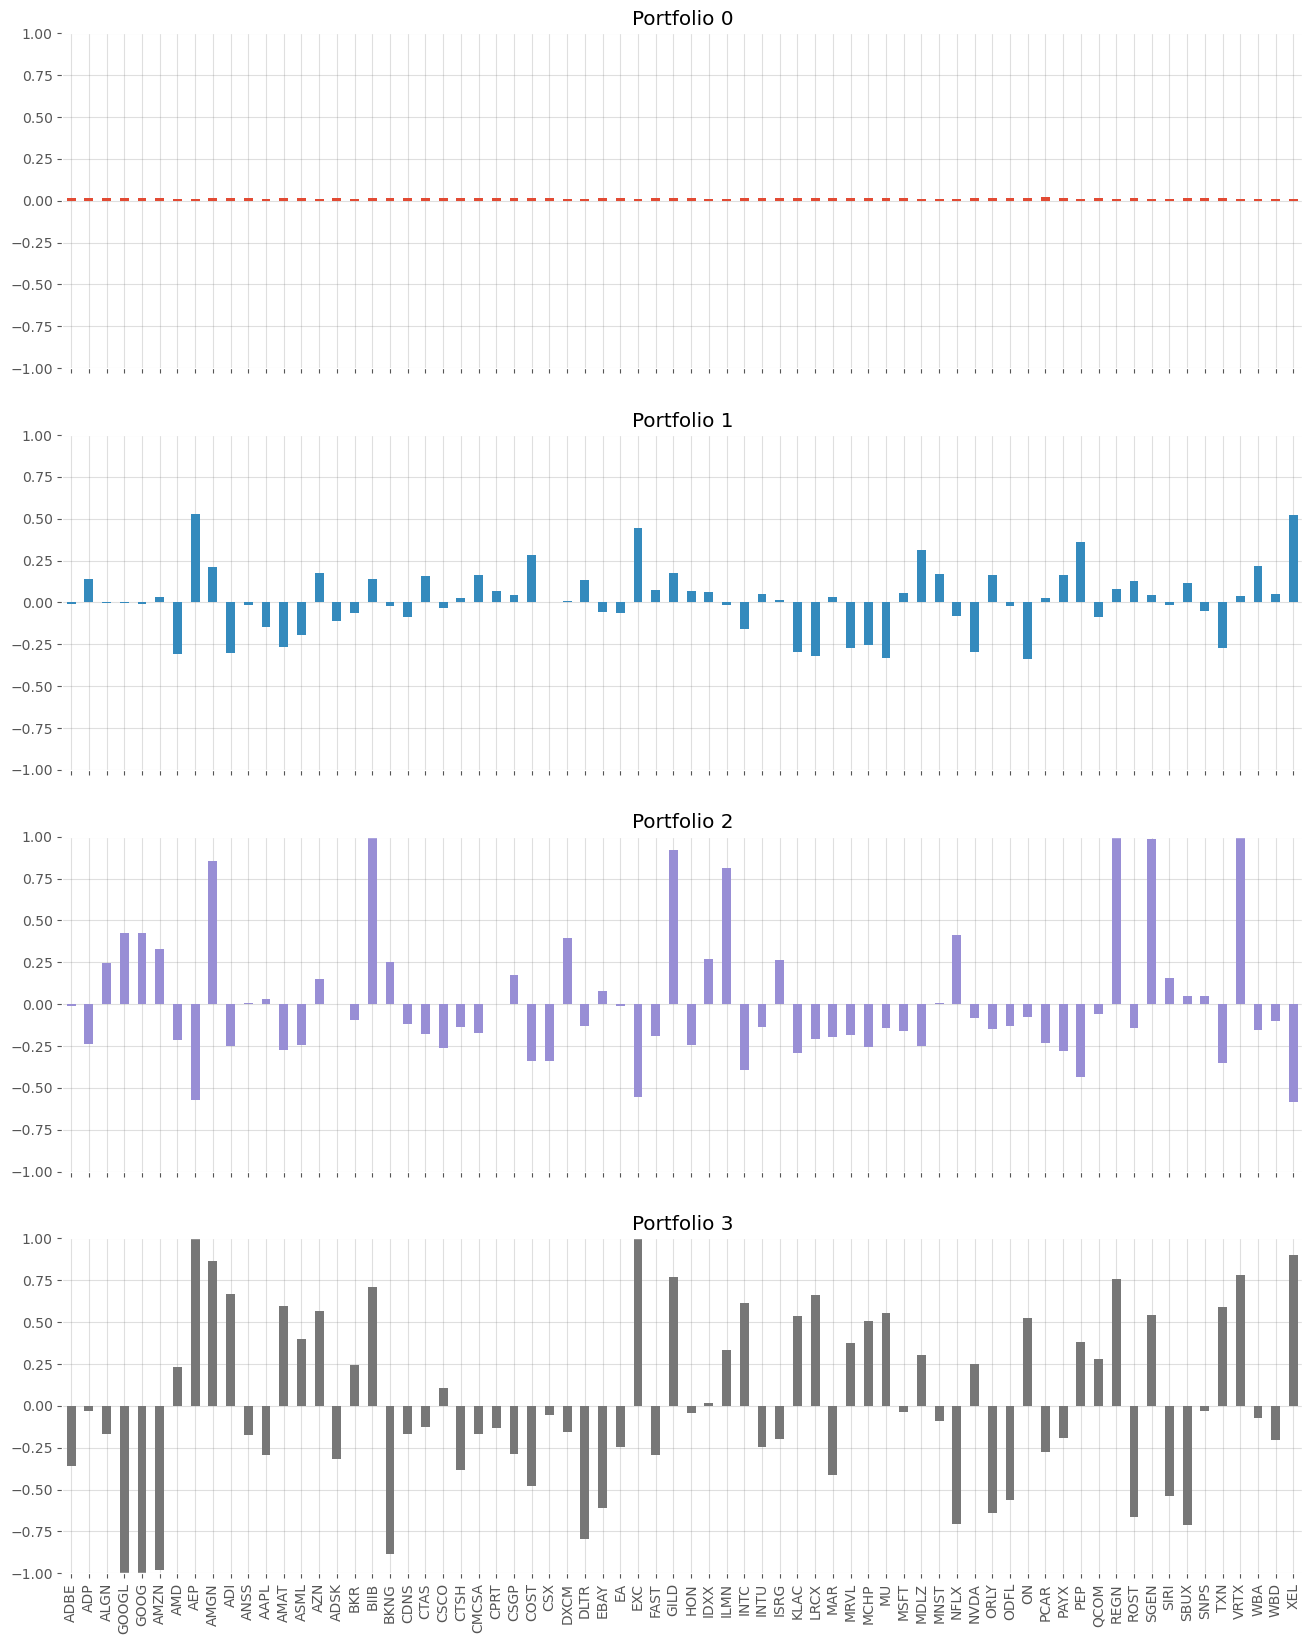

In [22]:
(
    eigen_portfolios
    .T  # Transpose the DataFrame to have portfolios as columns and assets as rows
    .plot
    .bar(subplots = True,
         layout = (int(NumComponents), 1),
         legend = False,
         sharey = True,
         figsize = [16, 20],
         ylim = [-1, 1]
        )
)

In [23]:
def calculate_sharpe_ratio(ts_returns, periods_per_year = 252):

    n_years = ts_returns.shape[0] / periods_per_year

    annualized_return = np.power(np.prod(1 + ts_returns), (1 / n_years)
                                ) - 1

    annualized_vol = ts_returns.std() * np.sqrt(periods_per_year)

    annualized_sharpe = annualized_return / annualized_vol

    if annualized_sharpe > 10:
        annualized_return = 0
        annualized_vol = 0
        annualized_sharpe = 0

    return annualized_return, annualized_vol, annualized_sharpe


# Gift

def recommend_optimal_portfolio():

    # Number of eigenportfolios or principal components
    
    n_portfolios = len(pca.components_)

    # Initialize arrays for annualized return, volatility, and Sharpe ratio of each eigenportfolio
    
    annualized_ret = np.array([0.] * n_portfolios)

    sharpe_metric = np.array([0.] * n_portfolios)

    annualized_vol = np.array([0.] * n_portfolios)

    # Variable to track the index of the eigenportfolio with the highest Sharpe ratio
    
    highest_sharpe = 0

    # Extract stock tickers from the scaled data
    
    stock_tickers =\
    (scaled_stock_data
     .columns 
     .values)

    n_tickers = len(stock_tickers)

    # Extract principal components
    
    PCs = pca.components_

    # Loop through each eigenportfolio

    for i in range(n_portfolios):

        # Normalize the weights of the i-th eigenportfolio
        
        pc_w = PCs[i] / sum(PCs[i])

        # Create a DataFrame for the eigenportfolio weights
        
        eigen_prtfi =\
            (
                pd
                .DataFrame(data = {"weights": pc_w.squeeze() * 100},
                           index = stock_tickers)
            )

        # Calculate returns for the eigenportfolio
        
        eigen_prtfi.sort_values(by = ["weights"],
                                ascending = False,
                                inplace = True)

        eigen_prti_returns =\
            (
                np
                .dot(X_Train_Raw.loc[ : , eigen_prtfi.index],
                     pc_w)
            )

        eigen_prti_returns =\
            (
                pd
                .Series(eigen_prti_returns.squeeze(),
                        index = X_Train_Raw.index)
            )

        # Calculate annualized return, volatility, and Sharpe ratio for the eigenportfolio
        
        er, vol, sharpe = calculate_sharpe_ratio(eigen_prti_returns)

        # Store the metrics in their respective arrays
        
        annualized_ret[i] = er
        annualized_vol[i] = vol
        sharpe_metric[i] = sharpe

        # Replace NaN values in Sharpe metric array with zeros
        
        sharpe_metric = np.nan_to_num(sharpe_metric)

    # Let's find a portfolio with the HIGHEST Sharpe Ratio

    highest_sharpe = np.argmax(sharpe_metric)

    # Print the details of the eigenportfolio with the highest Sharpe ratio
    
    print("Our Eigen Portfolio #%d with the highest Sharpe\
           \nReturn %.2f%%,\vol = %.2f%%, \nSharpe = %.2f" %
         (highest_sharpe,
          annualized_ret[highest_sharpe] * 100,
          annualized_vol[highest_sharpe] * 100,
          sharpe_metric[highest_sharpe]
         )
         )

    # Create a DataFrame to store the results for all eigenportfolios
    
    results =\
        (
            pd
            .DataFrame(data = {"Return": annualized_ret,
                               "Vol": annualized_vol,
                               "Sharpe": sharpe_metric}
                      )
        )

    results.dropna(inplace = True)

    results.sort_values(by = ["Sharpe"],
                        ascending = False,
                        inplace = True)

    # Print the top 10 eigenportfolios based on Sharpe ratio

    print(results.head(10)
         )

In [24]:
recommend_optimal_portfolio()

Our Eigen Portfolio #0 with the highest Sharpe           
Return 19.69%,ol = 14.03%, 
Sharpe = 1.40
      Return       Vol    Sharpe
0   0.196856  0.140335  1.402759
6   0.498625  0.445384  1.119539
38  1.035320  1.326840  0.780290
22  0.348323  0.702642  0.495733
9   0.353540  1.015766  0.348053
1   0.119890  0.355736  0.337020
45  0.233137  1.068787  0.218132
2   0.050946  0.638941  0.079735
13  0.000000  0.000000  0.000000
60  0.000000  0.000000  0.000000


In [25]:
def FindPortfolioVisual():
    
    n_portfolios = len(pca.components_)
    
    annualized_ret = np.array([0.] * n_portfolios)
    
    sharpe_metric = np.array([0.] * n_portfolios)
    
    annualized_vol = np.array([0.] * n_portfolios)
    
    highest_sharpe = 0
    
    stock_tickers = scaled_stock_data.columns.values
    
    n_tickers = len(stock_tickers)
    
    PCs = pca.components_
    
    for i in range(n_portfolios):
        
        pc_w = PCs[i] / sum(PCs[i]
                           )
        
        eigen_prtfi = pd.DataFrame(data = {"weights": pc_w.squeeze()*100}, 
                                   index = stock_tickers)
        
        eigen_prtfi.sort_values(by = ["weights"],
                                ascending = False,
                                inplace = True)
        
        eigen_prti_returns = np.dot(X_Train_Raw.loc[:, eigen_prtfi.index], 
                                    pc_w)
        
        eigen_prti_returns = pd.Series(eigen_prti_returns.squeeze(),
                                       index = X_Train_Raw.index)
        
        er, vol, sharpe = calculate_sharpe_ratio(eigen_prti_returns)
        
        annualized_ret[i] = er
        
        annualized_vol[i] = vol
        
        sharpe_metric[i] = sharpe
        
        sharpe_metric = np.nan_to_num(sharpe_metric)
        
    # HOW TO FIND A PORTFOLIO with the HIGHEST Sharpe Ratio
    
    highest_sharpe = np.argmax(sharpe_metric)
    
    print("Our Eigen Portfolio #%d with the highest Sharpe. Return %.2f%%, vol = %.2f%%, Sharpe = %.2f" %
          (highest_sharpe,
           annualized_ret[highest_sharpe]*100,
           annualized_vol[highest_sharpe]*100,
           sharpe_metric[highest_sharpe]
          )
         )
        
    #####
    
    fig, ax = plt.subplots()
    
    fig.set_size_inches(16, 6)
    
    ax.plot(sharpe_metric, 
            linewidth = 2)
    
    ax.set_title("Sharpe Ratio of Eigen-Portfolios")
    
    ax.set_ylabel("Sharpe Ratio")
    
    ax.set_xlabel("Portfolios")
    
    #####
        
    results = pd.DataFrame(data = {"Return": annualized_ret, "Vol": annualized_vol, "Sharpe": sharpe_metric}
                           )
    
    results.dropna(inplace = True)
    
    results.sort_values(by = ["Sharpe"],
                        ascending = False,
                        inplace = True)
    
    print(results.head(15)
         )
    
    plt.show()

Our Eigen Portfolio #0 with the highest Sharpe. Return 19.69%, vol = 14.03%, Sharpe = 1.40
      Return        Vol    Sharpe
0   0.196856   0.140335  1.402759
6   0.498625   0.445384  1.119539
38  1.035320   1.326840  0.780290
22  0.348323   0.702642  0.495733
9   0.353540   1.015766  0.348053
1   0.119890   0.355736  0.337020
45  0.233137   1.068787  0.218132
2   0.050946   0.638941  0.079735
13  0.000000   0.000000  0.000000
60  0.000000   0.000000  0.000000
39  0.000000   0.000000  0.000000
31  0.000000   0.000000  0.000000
69  0.000000   0.000000  0.000000
30 -0.999377  24.488028 -0.040811
18 -0.069849   1.103683 -0.063288


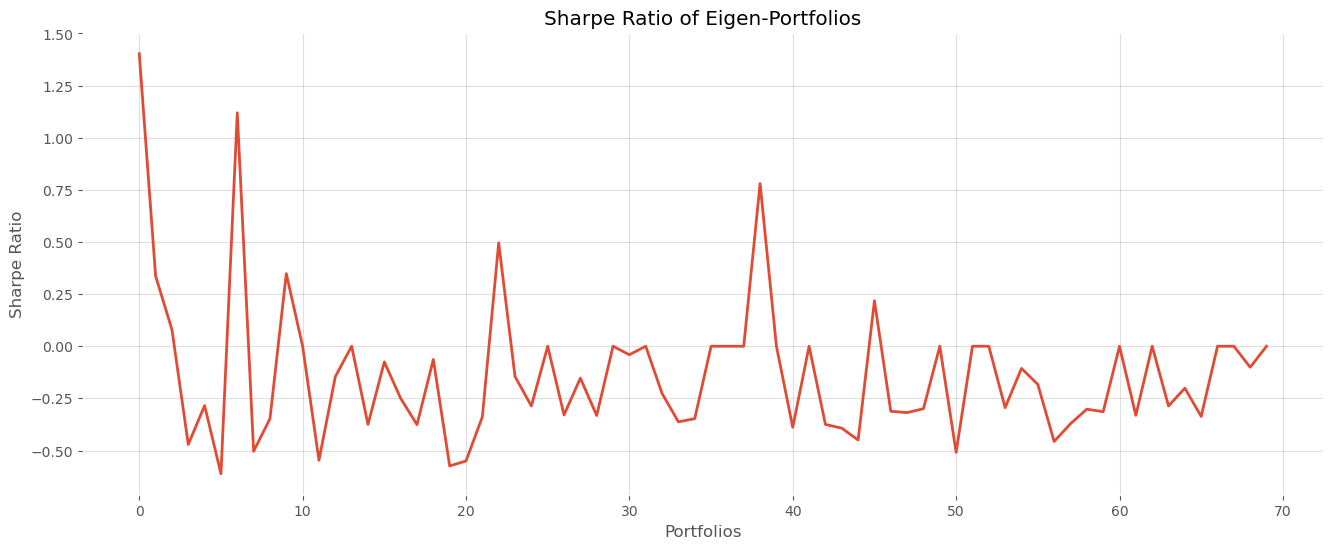

In [26]:
FindPortfolioVisual()

In [27]:
# Yet another gift

def backtest_PCA_porfolios(eigen):

    eigen_prtfi =\
        (
            pd
            .DataFrame(data = {"weights": eigen.squeeze()
                              },
                       index = stock_tickers)
        )

    eigen_prtfi.sort_values(by = ["weights"],
                            ascending = False,
                            inplace = True)

    eigen_prtfi_returns =\
    (
        np
        .dot(X_Test_Raw
             .loc[ : , eigen_prtfi.index],
             eigen)
    )

    eigen_portfolio_returns =\
    (
        pd
        .Series(eigen_prtfi_returns.squeeze(),
                index = X_Test_Raw.index)
    )

    returns, vol, sharpe = calculate_sharpe_ratio(eigen_portfolio_returns)

    print("Our PCA-based Portfolio:\nReturn = %.2f%%\nVolatility = %.2f%%\nSharpe = %.2f"  %
          (returns * 100, vol * 100, sharpe)
         )

    # Compared with what? Equal-weightage Portfolio

    equal_weight_return =\
    (
        X_Test_Raw * (1 / len(pca.components_)
                     )
    ).sum(axis = 1)

    df_plot =\
        (
            pd
            .DataFrame({"ML Portfolio Return": eigen_portfolio_returns,
                        "Equal Weight Index": equal_weight_return},
                      index = X_Test.index
                      )
        )

    (
        np
        .cumprod(df_plot + 1)
        .plot(title = "Returns of the equal weighted index vs. Eigen-Portfolio",
              figsize = [16, 8]
             )
    )

    plt.show()

### <font color = red> Answer 2 is presented in the cell below: </font>

Our PCA-based Portfolio:
Return = 47.31%
Volatility = 42.97%
Sharpe = 1.10


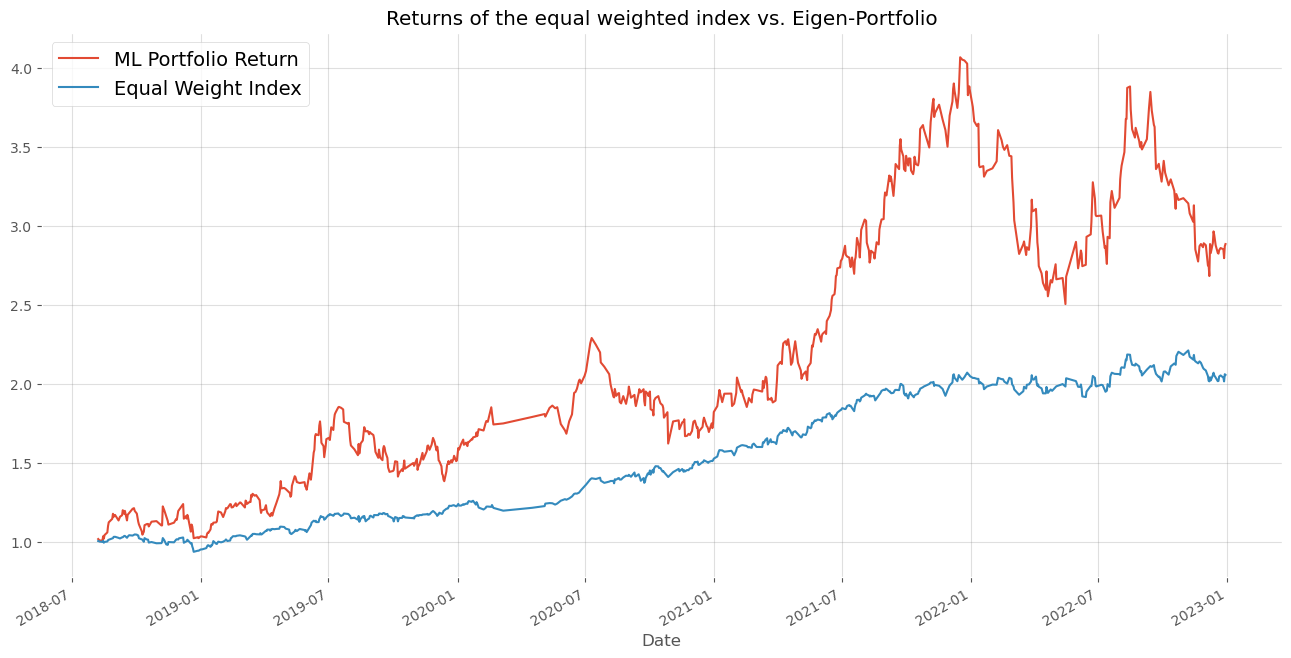

In [28]:
backtest_PCA_porfolios(eigen = weights[6]
                      )

Our PCA-based Portfolio:
Return = -59.05%
Volatility = 139.79%
Sharpe = -0.42


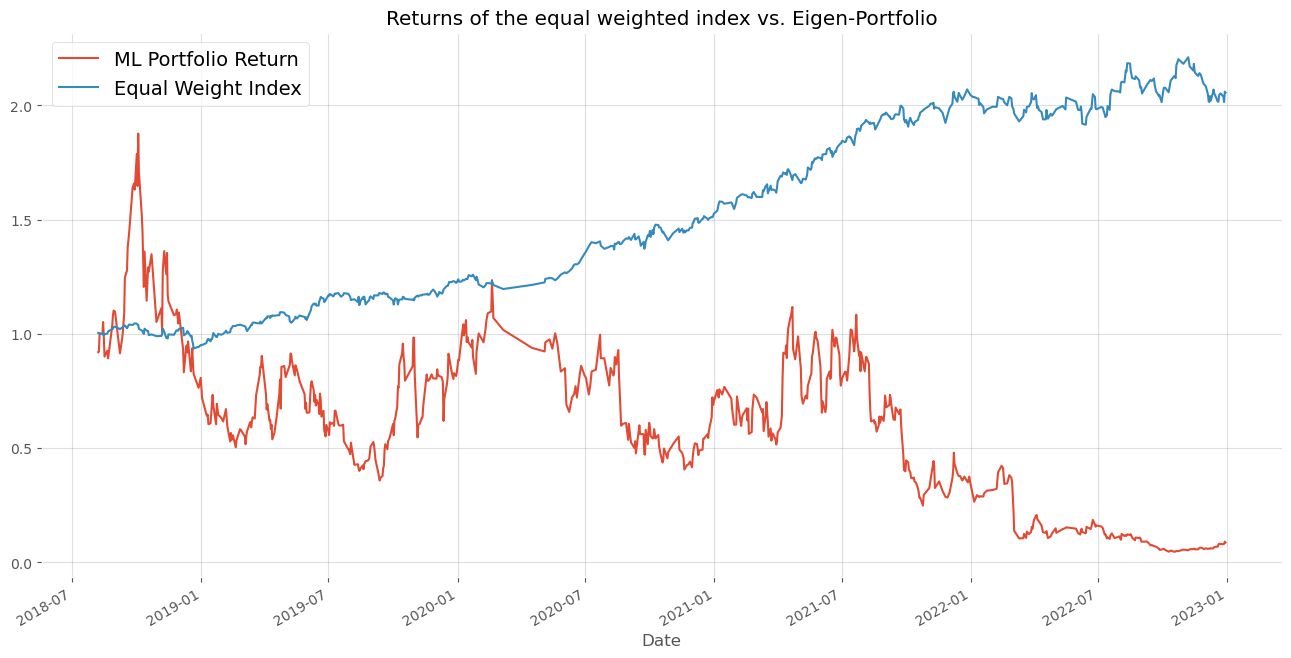

In [29]:
backtest_PCA_porfolios(eigen = weights[38]
                      )

Our PCA-based Portfolio:
Return = 33.81%
Volatility = 66.96%
Sharpe = 0.50


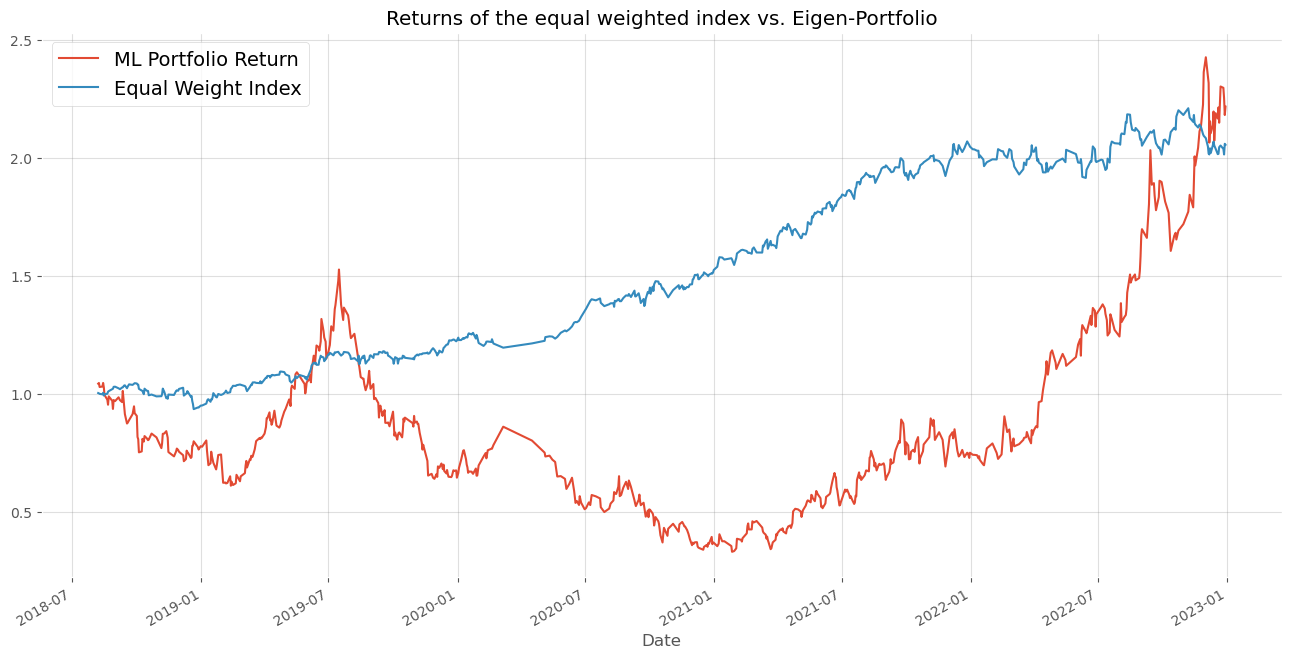

In [30]:
backtest_PCA_porfolios(eigen = weights[22]
                      )

### <font color = blue> 👉 Questions 3. Using `pandas.datareader`, extract the stock prices of the following ticker symbols, between July 2015 and June 2019.

- General Motors `GM`
- Marriott `MAR`
- Pfizer `PFE`
- ExxonMobil `XOM`
- The Walt Disney Company `DIS`
- Bank of America `BAC`
- Proctor & Gamble `PG`
- Hilton `HLT`
- Walmart `WMT`
- Twitter `TWTR`

### Then, calculate simple daily percentage changes in the stock prices, and store them into an object, printing the results into an output cell.

### Below are the lines of code that lead to an answer:

In [31]:
tickers = ["GM","MAR","PFE","XOM","DIS","BAC","PG","HLT","WMT","X"]
stock_list = []
for ticker in tickers:
    stock = yf.download(ticker,dt.datetime(2015, 7, 1),dt.datetime(2019, 6, 30))
    data = stock["Adj Close"]
    stock_list.append(pd.Series(data, name=ticker))

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


In [32]:
stock_data = pd.DataFrame(stock_list).T

In [33]:
stock_data

,GM,MAR,PFE,XOM,DIS,BAC,PG,HLT,WMT,X
Date,,,,,,,,,,
2015-07-01,26.602779,69.210793,23.574385,56.479935,107.926788,14.539390,62.619579,54.230209,60.511654,19.103958
2015-07-02,26.755762,69.035423,23.350468,57.007931,107.776794,14.378969,62.784496,54.230209,60.494831,18.424000
2015-07-06,26.288765,68.583176,23.266495,56.589661,108.461113,14.302979,62.878792,54.269249,61.058865,18.321541
2015-07-07,26.457848,69.626106,23.602375,56.822800,109.773514,14.091895,64.190559,54.366863,62.119587,18.619598
2015-07-08,25.113218,68.260170,23.406445,56.205681,107.983017,13.720390,63.617149,53.117493,61.505032,17.846500
...,...,...,...,...,...,...,...,...,...,...
2019-06-24,35.330406,133.337936,35.369076,61.493382,137.539108,25.234531,100.462791,94.451981,103.849617,14.008071
2019-06-25,36.018665,129.944992,35.369076,60.949963,138.250427,25.036119,99.917229,92.217018,103.364166,14.473395
2019-06-26,36.448822,132.255692,34.746723,61.213688,138.704849,25.171396,98.137459,93.472954,102.841362,14.783607


### <font color = red> Answer 3 is presented in the cell below: </font>

In [34]:
daily_returns = stock_data.pct_change().fillna(0)

In [35]:
daily_returns

,GM,MAR,PFE,XOM,DIS,BAC,PG,HLT,WMT,X
Date,,,,,,,,,,
2015-07-01,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2015-07-02,0.005751,-0.002534,-0.009498,0.009348,-0.001390,-0.011034,0.002634,0.000000,-0.000278,-0.035593
2015-07-06,-0.017454,-0.006551,-0.003596,-0.007337,0.006349,-0.005285,0.001502,0.000720,0.009324,-0.005561
2015-07-07,0.006432,0.015207,0.014436,0.004120,0.012100,-0.014758,0.020862,0.001799,0.017372,0.016268
2015-07-08,-0.050822,-0.019618,-0.008301,-0.010860,-0.016311,-0.026363,-0.008933,-0.022980,-0.009893,-0.041521
...,...,...,...,...,...,...,...,...,...,...
2019-06-24,0.001083,-0.002262,0.002061,-0.009525,-0.007202,-0.004979,0.010162,-0.006553,0.000990,-0.014997
2019-06-25,0.019481,-0.025446,0.000000,-0.008837,0.005172,-0.007863,-0.005430,-0.023662,-0.004675,0.033218
2019-06-26,0.011943,0.017782,-0.017596,0.004327,0.003287,0.005403,-0.017812,0.013619,-0.005058,0.021433


### <font color = blue> 👉 Questions 4. Using a box-and-whisker plot, compare the performance of the stocks over the given period of time. Find the stock with the highest variability and risk, based on the visualization.

### Below are the lines of code that lead to an answer:

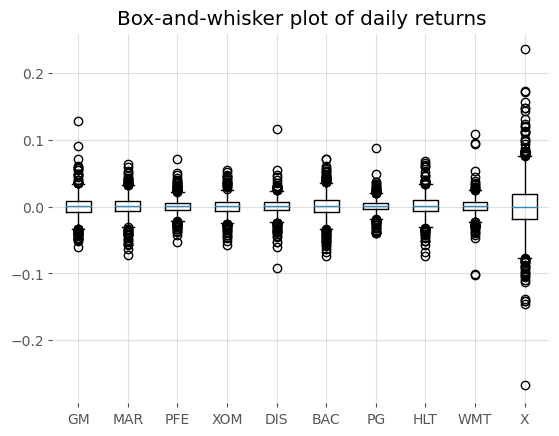

In [36]:
plt.boxplot(daily_returns, labels=tickers)
plt.title("Box-and-whisker plot of daily returns")
plt.show()

### <font color = red> Answer 4 is presented in the cell below: </font>

X has the highest variability

### <font color = blue> 👉 Questions 5. Create your own function to compare daily percentage changes between stocks, using a scatter plot and its distribution relative to a perfect diagonal (regression line). 

### Assess which of the following pairs seem to show the closest relationships.

1. ExxonMobil (`XOM`) and General Motors (`GM`)
2. Twitter (`TWTR`) and The Walt Disney Company (`DIS`)
3. Marriott (`MAR`) and Hilton (`HLT`)
4. Pfeizer (`PFE`) and Proctor & Gamble (`PG`)
5. Bank of America (`BAC`) and Walmart (`WMT`)

### Upon completion of the above, please execute more tasks for the sake of this question. 

### As you have learned in class, if you wish to look for all combinations of stocks you can use the scatter matrix graph provided by the `pandas` module. Create the scatter matrix, along with a Kernel Density Estimation on the diagonal.

### Below are the lines of code that lead to an answer:

In [37]:
ticker1 = ["GM","DIS","HLT","PG","WMT"]
ticker2 = ["XOM","X","MAR","PFE","BAC"]
def compare_daily_percentage_changes(ticker_symbols1, ticker_symbols2, start_date, end_date):
    fig, axs = plt.subplots(len(ticker_symbols1), 1, figsize=(12, 6 * len(ticker_symbols1)),sharex=True)
    
    for i in range(len(ticker_symbols1)):
        ticker1 = ticker_symbols1[i]
        ticker2 = ticker_symbols2[i]
        
        stock1 = yf.download(ticker1,start_date,end_date)
        df1= stock1["Adj Close"].pct_change()
    
        stock2 = yf.download(ticker2,start_date,end_date)
        df2= stock2["Adj Close"].pct_change()
        
        axs[i].plot((-0.2, 0.2),
            (-0.2, 0.2),
            color = "green")
        axs[i].scatter(df1, df2)
        axs[i].set_title(f"{ticker_symbols1[i]} vs. {ticker_symbols2[i]}")


### <font color = red> Answer 5 is presented in the cell below: </font>

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


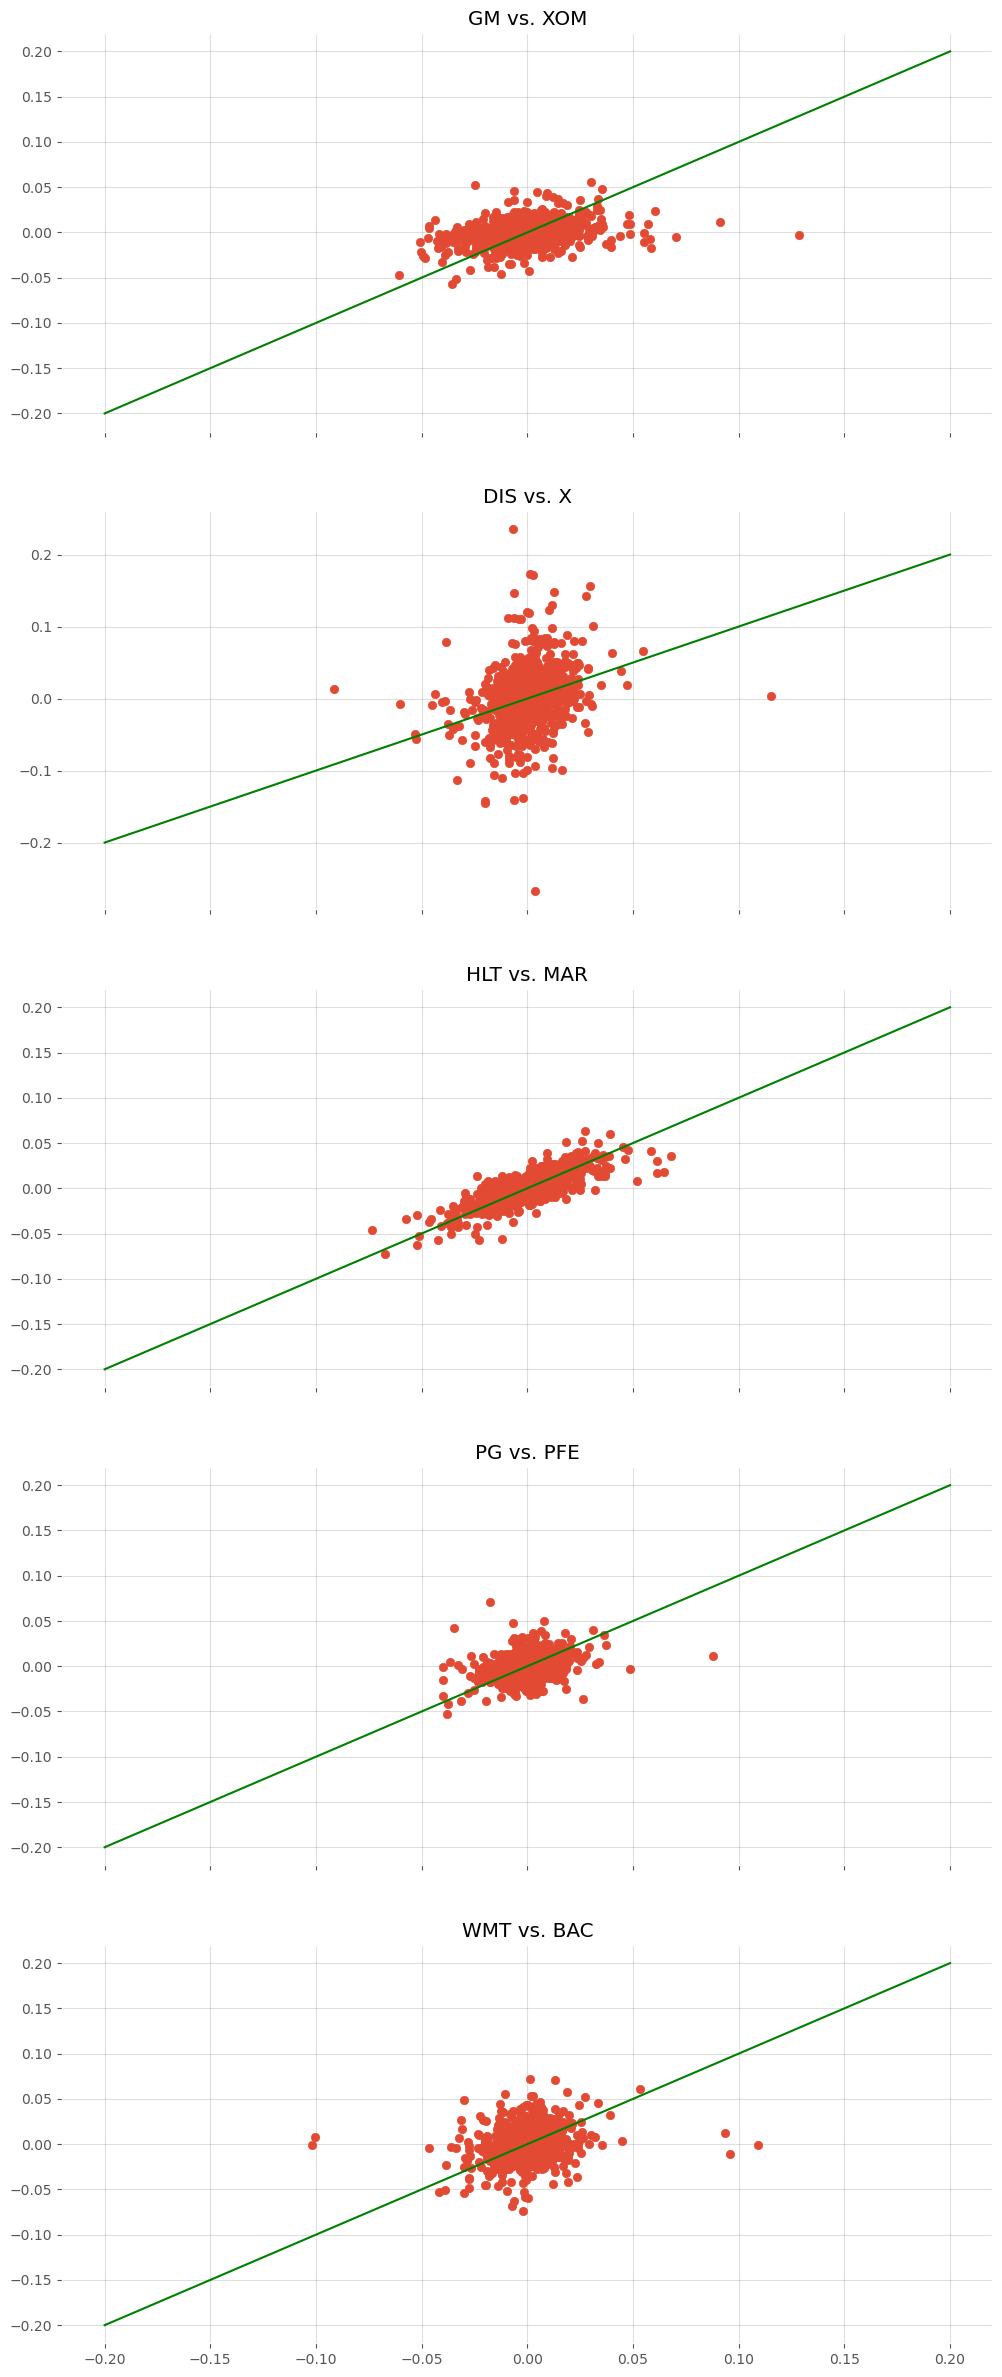

In [38]:
start = dt.datetime(2015, 7, 1)
end = dt.datetime(2019, 6, 30)
compare_daily_percentage_changes(ticker1, ticker2, start, end)

array([[<Axes: xlabel='GM', ylabel='GM'>,
        <Axes: xlabel='MAR', ylabel='GM'>,
        <Axes: xlabel='PFE', ylabel='GM'>,
        <Axes: xlabel='XOM', ylabel='GM'>,
        <Axes: xlabel='DIS', ylabel='GM'>,
        <Axes: xlabel='BAC', ylabel='GM'>,
        <Axes: xlabel='PG', ylabel='GM'>,
        <Axes: xlabel='HLT', ylabel='GM'>,
        <Axes: xlabel='WMT', ylabel='GM'>,
        <Axes: xlabel='X', ylabel='GM'>],
       [<Axes: xlabel='GM', ylabel='MAR'>,
        <Axes: xlabel='MAR', ylabel='MAR'>,
        <Axes: xlabel='PFE', ylabel='MAR'>,
        <Axes: xlabel='XOM', ylabel='MAR'>,
        <Axes: xlabel='DIS', ylabel='MAR'>,
        <Axes: xlabel='BAC', ylabel='MAR'>,
        <Axes: xlabel='PG', ylabel='MAR'>,
        <Axes: xlabel='HLT', ylabel='MAR'>,
        <Axes: xlabel='WMT', ylabel='MAR'>,
        <Axes: xlabel='X', ylabel='MAR'>],
       [<Axes: xlabel='GM', ylabel='PFE'>,
        <Axes: xlabel='MAR', ylabel='PFE'>,
        <Axes: xlabel='PFE', ylabel='PFE'>,
     

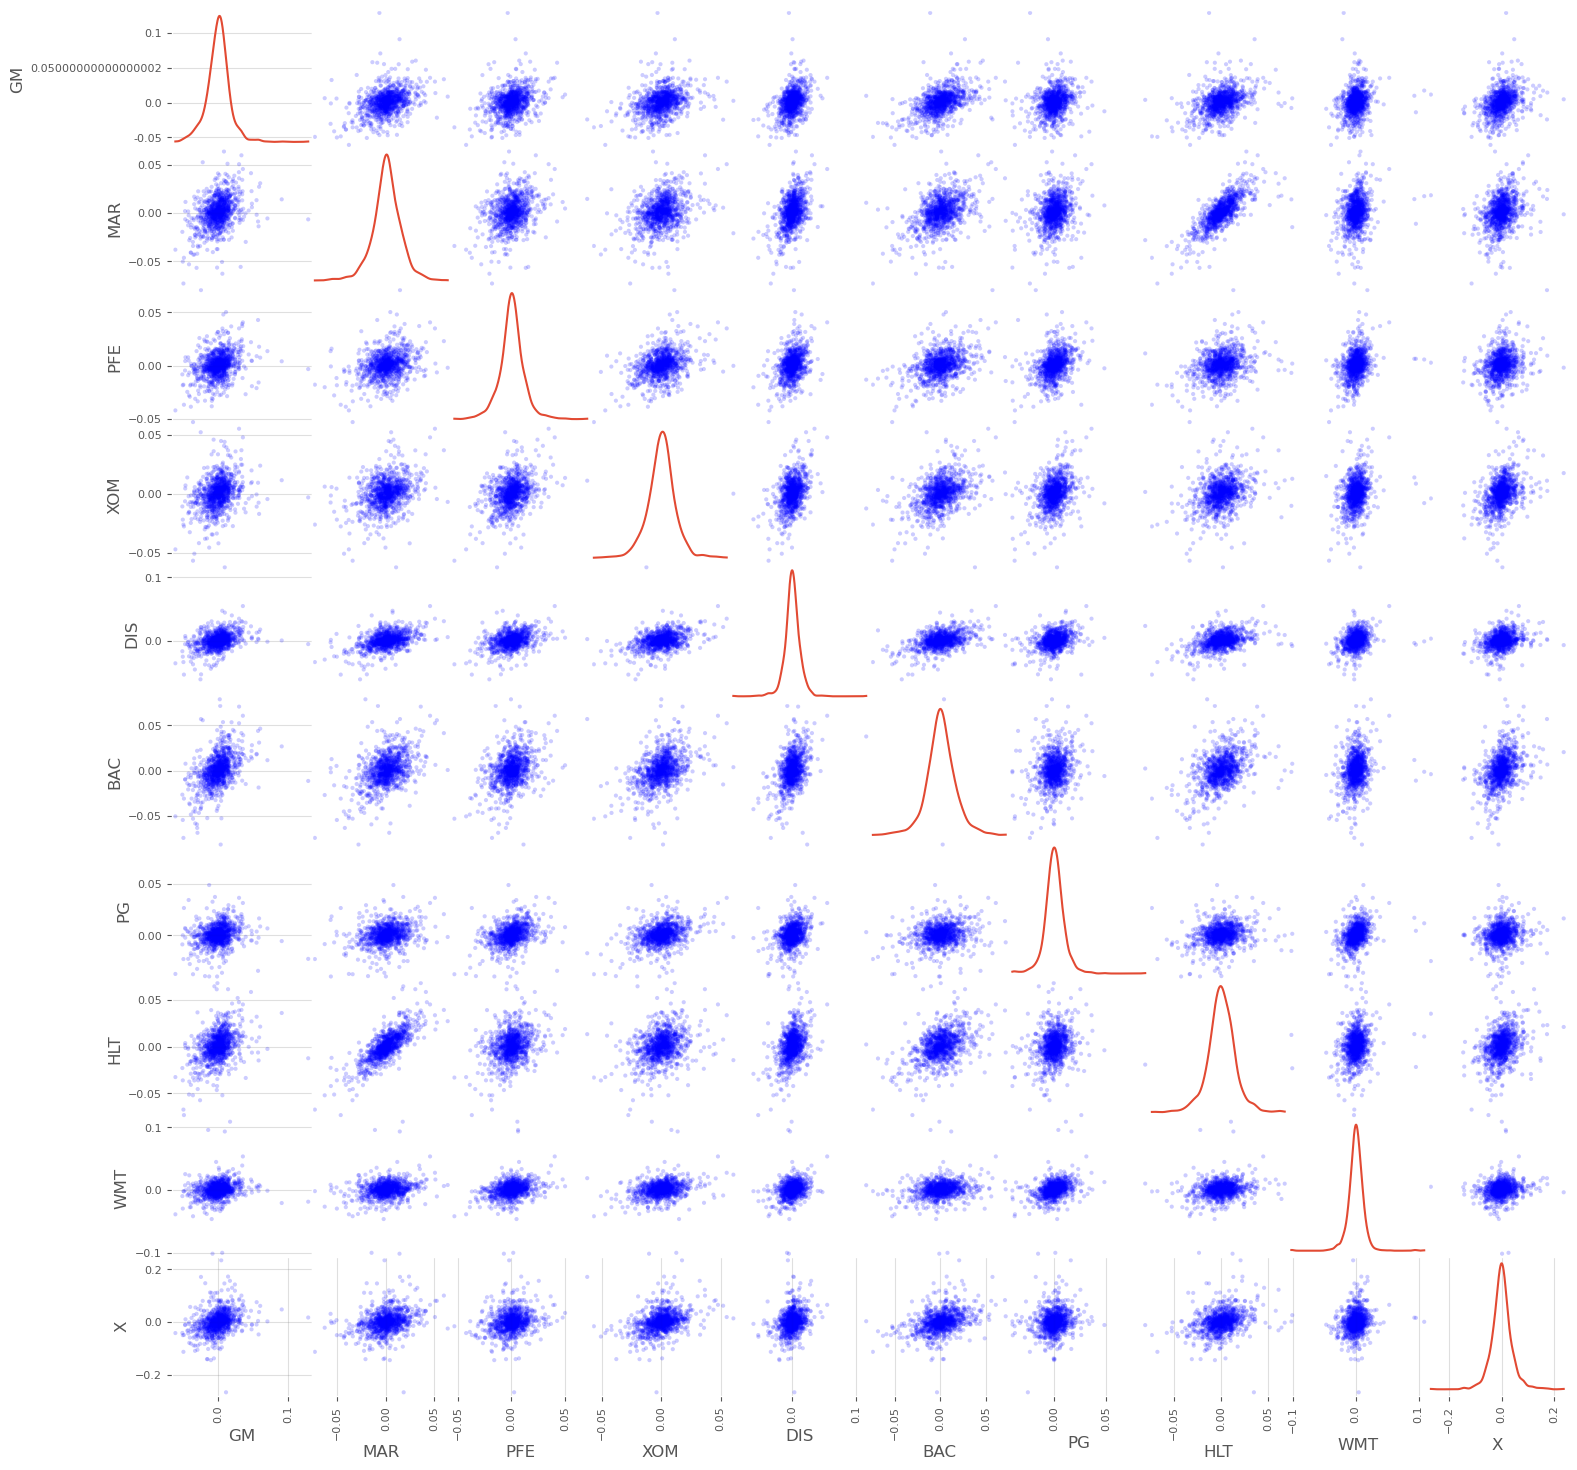

In [39]:
(
    pd
    .plotting
    .scatter_matrix(daily_returns,
                    diagonal = "kde", # Kernel Density Estimation
                    color = "blue",
                    alpha = 0.20,
                    figsize = [18, 18]
                   )
)

HLT vs MAR has closest relationship

### <font color = blue> 👉 Question 6. It is often useful to analyze stock performance against a market index such as the S&P 500. This will give a sense of how a stock price compares to movements in the overall market.

### Carry out the following analysis steps.

<font color = green>

> ### 1. Extract the S&P 500 (`^GSPC`) data for the same time period used for the stocks in Question 1.

> ### 2. In order to perform comparisons, you must run the same calculations to derive the daily percentage changes and cumulative returns on the index. You might first want to concatenate the index calculations in the results of the calculations of the stocks with respect to daily percentage changes. The process will lead you to efficiently compare the overall set of stocks and index calculations for daily percentage changes.

> ### 3. Calculate the cumulative daily returns.

> ### 4. To complete this analysis, calculate the correlation of the daily percentage change values.

> ### 5. Using location accessor, print only the correlational coefficients of each stock relative to the S&P 500, in descending order.

</font> 
        
### Which stock price moved in the most similar way to the S&P 500? Which moved in the least similar way?

### Below are the lines of code that lead to an answer:

In [40]:
start = dt.datetime(2000, 1, 1)
end = dt.datetime(2022, 12, 31)

In [41]:
SP500 = yf.download("^GSPC",start,end)["Adj Close"]

[*********************100%%**********************]  1 of 1 completed


In [42]:
SP = pd.DataFrame(SP500)
SP.columns = ["SP500"]
SP

,SP500
Date,
2000-01-03,1455.219971
2000-01-04,1399.420044
2000-01-05,1402.109985
2000-01-06,1403.449951
2000-01-07,1441.469971
...,...
2022-12-23,3844.820068
2022-12-27,3829.250000
2022-12-28,3783.219971


In [43]:
tickers = nasdaq100_components["Ticker"]
stock_list = []
for ticker in tickers:
    stock = yf.download(ticker,dt.datetime(2000, 1, 1),dt.datetime(2022, 12, 31))
    data = stock["Adj Close"]
    stock_list.append(pd.Series(data, name=ticker))
    
stock_data = pd.DataFrame(stock_list).T

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%*******

In [44]:
stock_data["SP500"] = SP
stock_data

,ADBE,ADP,ABNB,ALGN,GOOGL,GOOG,AMZN,AMD,AEP,AMGN,...,TTD,VRSK,VRTX,WBA,WBD,WDAY,XEL,ZM,ZS,SP500
Date,,,,,,,,,,,,,,,,,,,,,
2000-01-03,16.274670,25.075769,NaN,NaN,NaN,NaN,4.468750,15.500000,11.129500,45.956348,...,NaN,NaN,18.781250,17.925156,NaN,NaN,7.112461,NaN,NaN,1455.219971
2000-01-04,14.909398,25.075769,NaN,NaN,NaN,NaN,4.096875,14.625000,11.262254,42.442314,...,NaN,NaN,17.281250,17.258350,NaN,NaN,7.276234,NaN,NaN,1399.420044
2000-01-05,15.204174,24.834656,NaN,NaN,NaN,NaN,3.487500,15.000000,11.682660,43.902699,...,NaN,NaN,17.000000,17.454477,NaN,NaN,7.556988,NaN,NaN,1402.109985
2000-01-06,15.328287,25.166187,NaN,NaN,NaN,NaN,3.278125,16.000000,11.749039,44.632885,...,NaN,NaN,16.750000,16.944559,NaN,NaN,7.486797,NaN,NaN,1403.449951
2000-01-07,16.072987,25.738823,NaN,NaN,NaN,NaN,3.478125,16.250000,11.903922,49.652950,...,NaN,NaN,18.218750,17.376026,NaN,NaN,7.486797,NaN,NaN,1441.469971
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-12-23,338.450012,237.013687,85.250000,203.669998,89.230003,89.809998,85.250000,64.519997,92.992256,257.084625,...,44.880001,174.763290,289.690002,36.890579,9.17,164.639999,68.689735,65.889999,108.779999,3844.820068
2022-12-27,335.089996,237.102219,83.489998,204.589996,87.389999,87.930000,83.040001,63.270000,93.575340,256.568359,...,43.820000,174.713516,287.320007,36.584988,9.23,163.399994,69.309517,65.459999,107.570000,3829.250000
2022-12-28,328.329987,233.974045,82.489998,201.580002,86.019997,86.459999,81.820000,62.570000,92.671555,254.649399,...,43.320000,173.389923,285.760010,35.887859,8.87,162.990005,68.810287,65.360001,107.860001,3783.219971


In [45]:
stock_data_dpc = stock_data.pct_change().fillna(0)

### <font color = red> Answer 6 is presented in the cell below: </font>

In [46]:
corr = stock_data_dpc.corr()
matrix = corr["SP500"]
sort = matrix.sort_values(ascending=False)
df = pd.DataFrame(sort)
df.head(10)

,SP500
SP500,1.000000
PCAR,0.717987
MSFT,0.710277
HON,0.699588
ADP,0.677278
CTAS,0.672445
INTC,0.669806
MAR,0.658223
CSCO,0.654226
PAYX,0.651499


### <font color = blue> 👉 Question 7. One common type of data visualization in finance is a stock’s trading volume relative to its closing price.

### Create a chart below after obtaining the data from Yahoo Finance!, using `pandas.datareader`. The target symbol is `AMZN`, and our period of interest is between January 2007 and December 2009. 

In [47]:
df = yf.download("AMZN",dt.datetime(2007,1,1),dt.datetime(2009,12,31))

[*********************100%%**********************]  1 of 1 completed


In [48]:
df

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2007-01-03,1.9340,1.9530,1.9025,1.9350,1.9350,248102000
2007-01-04,1.9295,1.9570,1.9130,1.9450,1.9450,126368000
2007-01-05,1.9360,1.9395,1.8800,1.9185,1.9185,132394000
2007-01-08,1.9110,1.9155,1.8585,1.8750,1.8750,135660000
2007-01-09,1.8800,1.9030,1.8670,1.8890,1.8890,114060000
...,...,...,...,...,...,...
2009-12-23,6.7400,6.9525,6.7175,6.9470,6.9470,190922000
2009-12-24,6.9600,6.9850,6.8770,6.9235,6.9235,102576000
2009-12-28,6.9875,7.0990,6.9265,6.9655,6.9655,175278000


### Below are the lines of code that lead to an answer:

In [49]:
df["relative"] = df["Volume"]/df["Close"]

### <font color = red> Answer 7 is presented in the cell below: </font>

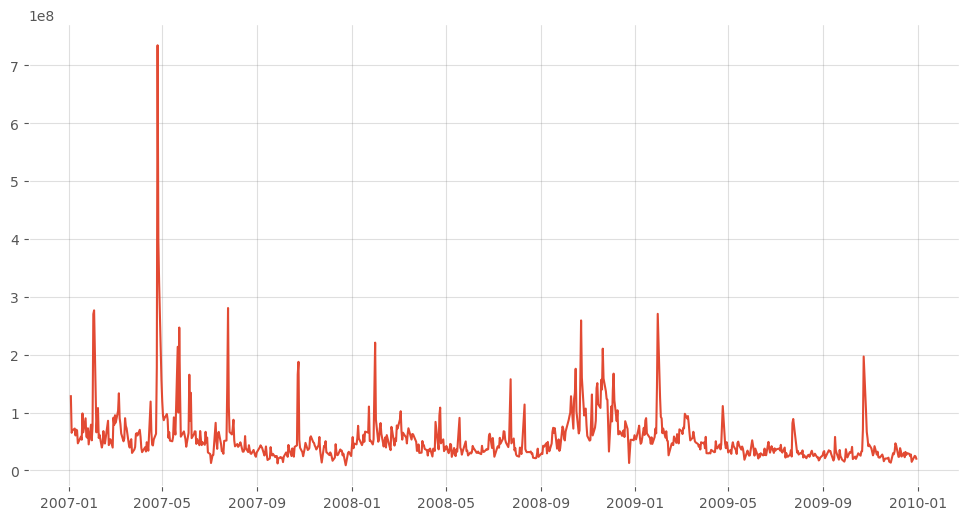

In [50]:
plt.figure(figsize=(12,6))
plt.plot(df.index,df["relative"])

## 👇 <font color = "purple"> Bigger Question 8. 

### Please create a predictive model for the weekly return of NFLX stock. You will use supervised learning for your predictive modelling.

> As you learned in class, to do this it is essential to know what factors are related to Netflix’s stock price, and to incorporate as much information as you can into the model.

> Among the three major factors (correlated assets, technical indicators, and fundamental analysis), you will use correlated assets and technical indicators as features here.

    Step 1. Use 75% of your data for the training of your algorithm, and 25% for the testing set.

    Step 2. For your feature engineering...
    
> Our operational definition of `outcome` (`Y`) is the weekly return of Netflix (NFLX). The number of trading days in a week is assumed to be five, and we compute the return using five trading days. 
<br>
    
* <font color = "green"> NOTE: The lagged five-day variables embed the time series component by using a time-delay approach, where the lagged variable is included as one of the predictor variables. This step translates the time series data into a supervised regression-based model framework.
<br>    
    
> For `input features` (`predictors`; `Xs`), we use (The variables used as predictors are as follows) ...

> `Correlated assets`

* lagged five-day returns of stocks (META, APPLE, AMZN, GOOGL);
* currency exchange rates (USD/JPY and GBP/USD);
* indices (S&P 500, Dow Jones, and VIX);
* lagged five-day, 15-day, 30-day, and 60-day returns of NFLX.

> `Technical indicators`

* 21-day, 63-day, and 252-day moving averages;
* 10-day, 30-day, and 200-day exponential moving averages;
* 10-day, 30-day, and 200-day relative strength index;
* stochastic oscillator %K and %D (using rolling windows of 10-, 30-, 200-day);
* rate of change (using 10-, 30-day past prices).
    
    
    Step 3. For your algorithm of choices, please assess the model performance of the following algorithms: 

    
* Linear Regression
* Elastic Net
* LASSO
* Support Vector Machine
* K-Nearest Neighbor
* ARIMA
* Decision Tree
* Extra Trees 
* Random Forest
* Gradient Boosting Tree
* Adaptive Boosting
    
    
    Step 4. For this exercise, hyperparameter tuning is not requested. 
    
    Step 5. But make sure to compare the model performance of the above algorithms.

> The metric for assessing model performance will be mean squared error (`MSE`).
<br>

> Show which of the algorithms perform relatively better by a comparison visualization of performance, for both the training and testing sets learned in class. 

    Step 6. Using the model of your choice, please visualize the actual vs. predicted (estimated) data.

### Below are the lines of code that lead to an answer:

In [51]:
# Loading Algorithm

from sklearn.linear_model import LinearRegression

# Regularization
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet

# Decision Tree
from sklearn.tree import DecisionTreeRegressor

# ENSEMBLE

## Bagging
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import ExtraTreesRegressor

## Boosting
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor

# Support Vector Machine
from sklearn.svm import SVR

# K-Nearest Neighbor
from sklearn.neighbors import KNeighborsRegressor

# Multi-layer Perceptron (Neural Networks)
from sklearn.neural_network import MLPRegressor

# for data split
from sklearn.model_selection import train_test_split

# for cross-validation
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV

# for assessment
from sklearn.metrics import mean_squared_error

# for Feature Selection
from sklearn.feature_selection import chi2, f_regression
from sklearn.feature_selection import SelectKBest

# for time series models
import statsmodels.tsa.arima.model as stats
import statsmodels.api as sm

#for data preparation and visualization
from pandas.plotting import scatter_matrix

# for Pre-processing (Feature Engineering)
from sklearn.preprocessing import StandardScaler

# assumption checks for Time-Series
from statsmodels.graphics.tsaplots import plot_acf

In [52]:
stock_ticker = ["NFLX","META", "AAPL", "AMZN", "GOOGL"]

currency_ticker = ["DEXJPUS", "DEXUSUK"]

index_ticker = ["SP500", "DJIA", "VIXCLS"]

stock_data = yf.download(stock_ticker)
currency_data = pdr.get_data_fred(currency_ticker)
index_data = pdr.get_data_fred(index_ticker)

[*********************100%%**********************]  5 of 5 completed


In [53]:
return_period = 5

Y =\
    (np
     .log(stock_data.loc[ : , ("Adj Close", "NFLX")]
         )
     .diff(return_period)
     .shift(-return_period)
    )

Y.name =\
    (Y
     .name[-1]
     +
     "_pred")

X1 =\
    (np.
     log(stock_data.loc[ : , ("Adj Close", ("META", "AAPL", "AMZN", "GOOGL")
                             )
                       ]
        )
     .diff(return_period)
    )

X1.columns =\
    (X1
     .columns
     .droplevel()
    )

X2 =\
    (np
     .log(currency_data)
     .diff(return_period)
    )

X3 =\
    (np
     .log(index_data)
     .diff(return_period)
    )

X4 =\
    (
    pd
    .concat([np
             .log(stock_data.loc[ : , ("Adj Close", "NFLX")
                                ]
                 )
             .diff(i) for i in [return_period, 
                                return_period * 3, 
                                return_period * 6, 
                                return_period * 12]
            ],
           axis = 1
           )
    .dropna()
)

X4.columns = ["NFLX_DT", "NFLX_3DT", "NFLX_6DT", "NFLX_12DT"]



X=\
(
    pd
    .concat([X1, X2, X3, X4],
            axis = 1)
)

X["21day"] = stock_data["Adj Close"]["NFLX"].rolling(window=21).mean()
X["63day"] = stock_data["Adj Close"]["NFLX"].rolling(window=63).mean()
X["252day"] = stock_data["Adj Close"]["NFLX"].rolling(window=252).mean()



X["10day"] = stock_data["Adj Close"]["NFLX"].ewm(span=10, min_periods=10).mean()
X["30day"] = stock_data["Adj Close"]["NFLX"].ewm(span=30, min_periods=30).mean()
X["200day"] = stock_data["Adj Close"]["NFLX"].ewm(span=200, min_periods=200).mean()


data =\
(
pd
.concat([Y, X],
        axis = 1)
.dropna()
.iloc[ : :return_period, :]
)

Y = data.loc[ : , Y.name]
X = data.loc[ : , X.columns]

In [54]:
#testing set
validation_size = 0.25

train_size =\
    int(len(X) 
        * 
        (1 - validation_size)
       )

X_train, X_test =\
    (X[0         :train_size], 
     X[train_size:len(X)    ]
    )

Y_train, Y_test =\
    (Y[0         :train_size], 
     Y[train_size:len(X)    ]
    )

In [55]:
num_folds = 10
seed = 231023
scoring = "neg_mean_squared_error"

models = []

models.append(("LR", LinearRegression()
             )
            )

models.append(("LASSO", Lasso()
             )
            )

models.append(("EN", ElasticNet()
             )
            )

models.append(("CART", DecisionTreeRegressor()
             )
            )

models.append(("KNN", KNeighborsRegressor()
             )
            )

models.append(("SVR", SVR()
             )
            )

# Bagging (Boostrap Aggregation)

models.append(("RFR", RandomForestRegressor()
              )
             )

models.append(("ETR", ExtraTreesRegressor()
              )
             )

# Boosting

models.append(("GBR", GradientBoostingRegressor()
              )
             )

models.append(("ABR", AdaBoostRegressor()
              )
             )

# Alternatives
## light GMB
## CAT Boost

In [56]:
### Initialization of Lists:

names = []

kfold_results = []

train_results = []
test_results = []

# Four empty lists are initialized. 
# names will store the names of the models, 
# kfold_results will store the cross-validation results, 
# train_results and test_results 
# will store the performance of the models 
# on the training and testing datasets, respectively.

### Looping through Models:

# Let's iterate over a list of models. 

# Each element in the models list is a tuple 
# containing the name of the model (name) and the model object (model).

for name, model in models:
    
### Appending Model Names:

# The name of the current model is appended to the names list.

    names.append(name)
    
### Let's run K-fold Cross-Validation
    
    kfold =\
        (KFold(n_splits = num_folds,
               random_state = seed,
               shuffle = True)
        )
    
# A KFold object is created with a specified number of splits (num_folds), 
# a random seed (seed), 
# and shuffling enabled.
    
### Running Cross-Validation:
# Let's convert MSE to positive (Here, now it becomes lower the better; See below)

    cv_results =\
        (
         -1
         *
         cross_val_score(model, X_train, Y_train,
                         cv = kfold,
                         scoring = scoring)
        )
        
# Cross-validation is performed on the training data (X_train, Y_train) using the current model. 
# The negative mean squared error is used 
# as the scoring metric 
# (hence multiplied by -1 to make it positive, 
# as the convention is that higher scores are better).

# Storing Cross-Validation Results:
 
### The cross-validation results for the current model are appended to the kfold_results list.    
    
    kfold_results.append(cv_results)

# Fitting the Model on the Entire Training Set:
  
    res = model.fit(X_train, Y_train) # The model is trained on the entire training dataset.

### Evaluating Model on Training Set:

# The trained model’s predictions on the training set are evaluated 
# using the mean squared error, and the result is appended to train_results.

    train_result = mean_squared_error(res.predict(X_train), Y_train)
    
    train_results.append(train_result)

## Evaluating Model on Testing Set:    
    
# Similarly, the model’s performance is evaluated 
# on the testing set and appended to test_results.
    
    test_result = mean_squared_error(res.predict(X_test), Y_test)
    
    test_results.append(test_result)
    
# Printing the Results:

# The name of the model, 
# the average cross-validation score, 
# the standard deviation of the cross-validation scores, 
# the training set performance, 
# and the testing set performance are printed out.

    message = "%s: %f (%f) %f %f" % (name, cv_results.mean(), 
                                     cv_results.std(), 
                                     train_result, 
                                     test_result)
    print(message)

LR: 0.006650 (0.005892) 0.004405 0.008408
LASSO: 0.005774 (0.006504) 0.005585 0.003762
EN: 0.005760 (0.006442) 0.005507 0.003659
CART: 0.011084 (0.009476) 0.000000 0.016850
KNN: 0.006805 (0.006271) 0.004093 0.005343
SVR: 0.006079 (0.005934) 0.005456 0.003844
RFR: 0.007406 (0.006583) 0.001011 0.004547
ETR: 0.008068 (0.006882) 0.000000 0.005017
GBR: 0.007869 (0.006873) 0.000292 0.005917
ABR: 0.007813 (0.006686) 0.001890 0.004204


In [57]:
# Basic Set-up for ARIMA

X_train_ARIMA =\
    (X_train
    .loc[ : , ["META", "AAPL", "AMZN", "GOOGL", "DEXJPUS", "SP500", "DJIA", "VIXCLS"]]
   )

X_test_ARIMA =\
    (X_test
    .loc[ : , ["META", "AAPL", "AMZN", "GOOGL", "DEXJPUS", "SP500", "DJIA", "VIXCLS"]]
)    

train_len = len(X_train_ARIMA)
test_len = len(X_test_ARIMA)
total_len = len(X)

modelARIMA =\
(    stats
     .ARIMA(endog = Y_train,
                exog = X_train_ARIMA,
                order = [1, 0, 0]
            )
)

model_fit = modelARIMA.fit()

error_training_ARIMA =\
(    mean_squared_error(Y_train,
                       model_fit.fittedvalues)
)

predicted =\
(
    model_fit
    .predict(start = train_len - 1,
             end = total_len - 1,
             exog = X_test_ARIMA)[1: ]
)

error_testing_ARIMA =\
(    mean_squared_error(Y_test,
                        predicted)
)

error_testing_ARIMA

test_results.append(error_testing_ARIMA)

train_results.append(error_training_ARIMA)

names.append("ARIMA")

C:\Users\bryan\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\bryan\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\bryan\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\bryan\anaconda3\Lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\bryan\a

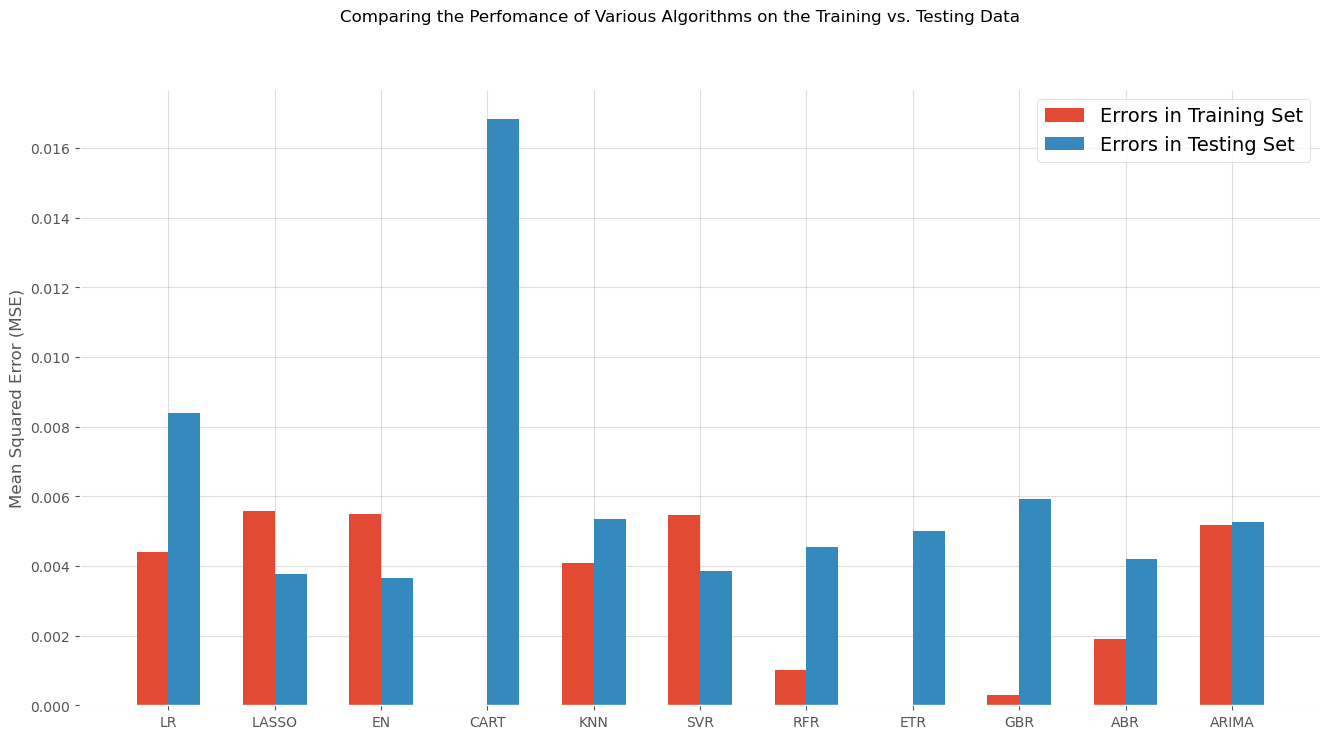

In [58]:
fig = plt.figure(figsize = [16, 8])

ind = np.arange(len(names)
               )

width = 0.30

fig.suptitle("Comparing the Perfomance of Various Algorithms on the Training vs. Testing Data")

ax = fig.add_subplot(111)

(plt
 .bar(ind - width/2,
    
      # Team, this line calculates the starting x position of the bars 
      # representing "Errors in Training Set". 
      # The width/2 term is used to shift the bars to the left, 
      # so they are centered around the tick mark for each group (algorithm) on the x-axis.
      
      # The bar chart will have two sets of bars for each algorithm: 
      # one for training errors and one for testing errors. 
      
      # By subtracting width/2 from ind, 
      # the training error bars are positioned to the left of the center of the tick marks. 
      
      train_results,
      width = width,
      label = "Errors in Training Set")
)

(plt
 .bar(ind + width/2,
      test_results,
      width = width,
      label = "Errors in Testing Set")
)

plt.legend()

ax.set_xticks(ind)
ax.set_xticklabels(names)

plt.ylabel("Mean Squared Error (MSE)")

plt.show()

### <font color = red> Answer 8 is presented in the cell below: </font>

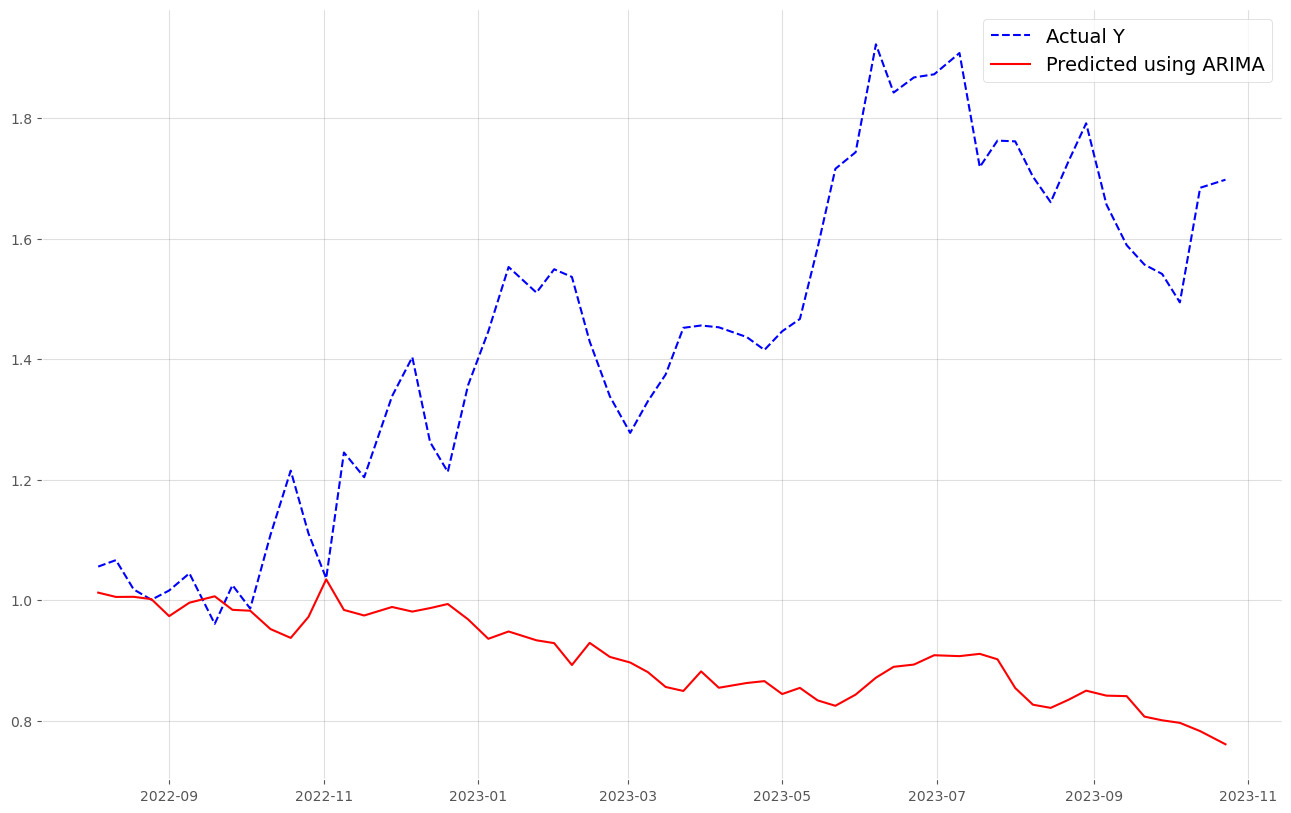

In [59]:
plt.figure(figsize = (16, 10)
           )

predicted.index = Y_test.index

plt.plot(np.exp(Y_test).cumprod(), "b--", label = "Actual Y")

plt.plot(np.exp(predicted).cumprod(), "r", label = "Predicted using ARIMA")

plt.legend()
plt.show()

In [60]:
for name,model in models:
    print(model)

LinearRegression()
Lasso()
ElasticNet()
DecisionTreeRegressor()
KNeighborsRegressor()
SVR()
RandomForestRegressor()
ExtraTreesRegressor()
GradientBoostingRegressor()
AdaBoostRegressor()


In [61]:
res = Lasso().fit(X_train, Y_train) # The model is trained on the entire training dataset.
train_result = mean_squared_error(res.predict(X_train), Y_train)
test_result = mean_squared_error(res.predict(X_test), Y_test)
predicted = res.predict(X_test)

print(train_result)
print(test_result)

0.005585381500018845
0.003761737282642208


In [62]:
predicted

array([-0.   , -0.   , -0.   , -0.   , -0.   , -0.   , -0.   , -0.   ,
       -0.   , -0.   , -0.   , -0.   , -0.   , -0.   , -0.   , -0.   ,
       -0.   , -0.001, -0.001, -0.001, -0.001, -0.001, -0.001, -0.001,
       -0.001, -0.001, -0.001, -0.001, -0.001, -0.001, -0.001, -0.001,
       -0.001, -0.001, -0.001, -0.001, -0.001, -0.001, -0.001, -0.001,
       -0.001, -0.001, -0.001, -0.001, -0.001, -0.001, -0.001, -0.001,
       -0.001, -0.001, -0.001, -0.001, -0.001, -0.001, -0.001, -0.001,
       -0.001, -0.001, -0.001])

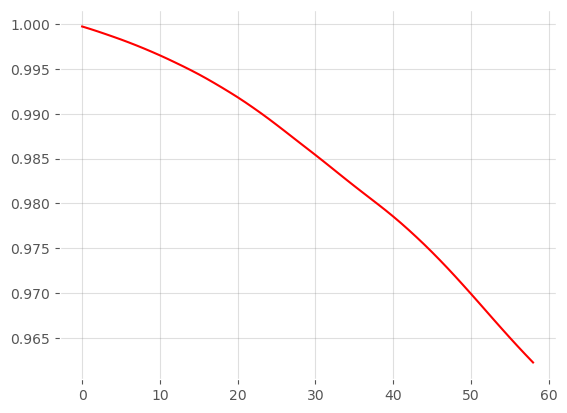

In [63]:
plt.plot(np.exp(predicted).cumprod(), "r", label = "Predicted using ARIMA")

In [64]:
plt.figure(figsize = (16, 10)
           )

predicted.index = Y_test.index

plt.plot(np.exp(Y_test).cumprod(), "b--", label = "Actual Y")

plt.plot(np.exp(predicted).cumprod(), "r", label = "Predicted using ARIMA")

plt.legend()
plt.show()

AttributeError: 'numpy.ndarray' object has no attribute 'index'

<Figure size 1600x1000 with 0 Axes>

> 💯 “Thank you for putting your efforts into the individual assessment questions” 😊